<a href="https://colab.research.google.com/github/mohith-ds8/Airbnb-Data-Analysis-EDA/blob/main/Airbnb_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





NaN:
1.   replace name by type of room
2.   replace price by mean area price 







In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [83]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.749398,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143815,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df[df['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaN,NaN,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,NaN,1,365


In [ ]:
lc = pd.DataFrame(df.groupby(['host_name'])['calculated_host_listings_count'].mean())

In [ ]:
lc.sort_values(['calculated_host_listings_count'],ascending=False).head(15)

,calculated_host_listings_count
host_name,
Sonder (NYC),327.000000
Blueground,232.000000
Kazuya,103.000000
Kara,102.650350
Sonder,96.000000
Jeremy & Laura,96.000000
Corporate Housing,91.000000
Pranjal,65.000000
Ken,63.181818


In [ ]:
ndf = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean()

In [ ]:
ndf

neighbourhood_group  neighbourhood
Bronx                Allerton          87.595238
                     Baychester        75.428571
                     Belmont           77.125000
                     Bronxdale         57.105263
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
                     Woodrow          700.000000
Name: price, Length: 221, dtype: float64

#Cleaning

### replace null names & host names by room_type

In [4]:
# replace null names by room_type

df['name'].fillna(df['room_type'],inplace=True)

In [5]:
# replace host names by room_type
df['host_name'].fillna(df['room_type'],inplace=True)

In [6]:
# checking null values
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### droping last_review & replacing reviews_per_month by zero

In [7]:
# dropping 'last review' column
df.drop(['last_review'],axis=1,inplace=True)

In [8]:
# replacing null values in 'reviews per month' by 0
df['reviews_per_month'].fillna(0,inplace=True)

In [9]:
# checking null values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### replacing price=0 by avg price of neighbour_grp & room_type 

In [13]:
# get all rows eith price=0
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [10]:
avg_price_neighbourhood = pd.DataFrame(df.groupby(['neighbourhood_group'])['price'].mean())

In [11]:
avg_price_neighbourhood

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [81]:
df['price'][(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)] = 87.496792
df['price'][(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)] = 124.383207
df['price'][(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)] = 196.875814

<ipython-input-81-6840e4a836c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)] = 87.496792
<ipython-input-81-6840e4a836c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)] = 124.383207
<ipython-input-81-6840e4a836c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neigh

In [82]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [84]:
#Changing values of 'minimum_nights' to 365 which are greater than 365
df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

In [85]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.749398,6.942980,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143815,17.530294,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


### other observations
* avg price of an airbnb unit
* avg min nigths set by the host
* min=0 for days available in year represents biz is closed / discontinued

#EDA

Graphs:
*   neighbourhood grp & neighbourhood count
*   neighbourhood grp & neighbourhood prices
*   which area has most number of listers
*   top selling room types by area
*   availability room type by area
*   price boxplot area
*   no of reviews vs price
*   availaability vs area

In [86]:
import seaborn as sns

In [117]:
nc = df['neighbourhood_group'].value_counts()
nc

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

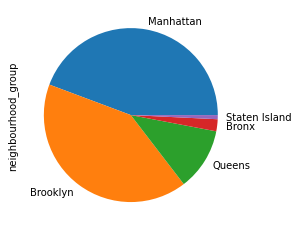

In [122]:
nc.plot(kind='pie')

In [135]:
np = df.groupby('neighbourhood_group')['price'].mean()
np

neighbourhood_group
Bronx             87.576991
Brooklyn         124.438890
Manhattan        196.884903
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

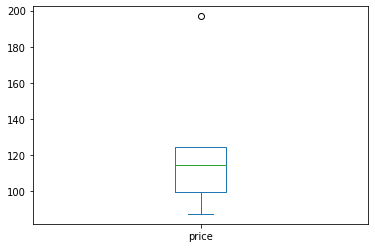

In [134]:
np.plot(kind='box')

In [102]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [138]:
hosts = df.groupby(['neighbourhood_group'])['host_id'].count()
hosts

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

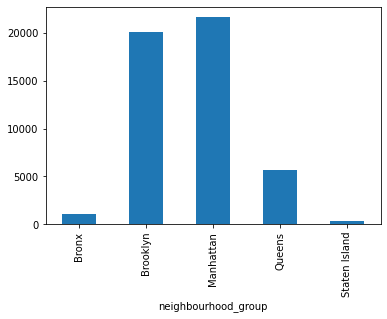

In [140]:
hosts.plot(kind='bar')

In [112]:
nnc = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


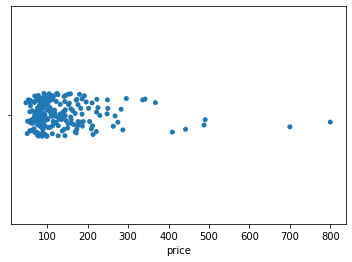

In [116]:
sns.stripplot(nnc)